In [1]:
%load_ext autoreload

%autoreload 2

from glob import glob
from os.path import join
import os
import pickle

import scipy.linalg
import matplotlib
matplotlib.rcParams["figure.dpi"] = 144
matplotlib.rcParams["savefig.dpi"] = 144
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import Table, Column
import astropy.units as u

import emcee

import kepler
import threebody

import minuit_wrap
%matplotlib inline

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
#logger.setLevel(logging.INFO)
logging.debug("test")

DEBUG:root:test


In [14]:
params = dict(files="tuned_mueller_pulses_selected",
             tzrmjd_middle='auto',
             parfile="0337_tempo2_px_optical.par",
             fit_pos=True,
             fit_pm=True,
             fit_px=True,
             efac=1,
             t2_astrometry=True,
             kopeikin=False,
             ppn_mode='GR',
             linear_jumps=True,
             linear_dm=True,
             toa_mode="pipeline")
F = threebody.Fitter(**params)

DEBUG:threebody:Fitting DM
DEBUG:threebody:base telescope AO_1400 from list of ['AO_1400', 'AO_430', 'GBT_1400', 'WSRT_1400', 'WSRT_350']


DEBUG:threebody:Started residuals for {'f0': 365.95336876828094, 'shapiro': True, 'pm_x': -4.7253571656398304e-11, 'pm_y': 5.176655321908803e-11, 'j_NCY1400': 0.000675, 'asini_i': 1.2175268328187250986, 'eps2_i': -9.1322420630293142815e-05, 'delta_lan': -3.0460572022280719438e-05, 'eps2_o': -0.003462206702875036605, 'q_i': 0.13726885399693244624, 'general': True, 'j_GBT350': 1.8510494219682503864e-05, 'dgamma': 1.175749501990592583e-06, 'tasc_i': 0.40771687041875256721, 'ppn_mode': 'GR', 'd_RAJ': -3.2388334094615887816e-08, 'acosi_i': 1.4922596784609649978, 'acosi_o': 91.530732348852743868, 'special': True, 'tasc_o': 313.93576888835902119, 'eps1_o': 0.035186244412656308993, 'eps1_i': 0.00068692611243786728556, 'tol': 1e-16, 'd_PMRA': 9.885280864586482e-11, 'j_WSRT350': -3.6586764591042250491e-05, 'd_PMDEC': -1.9580532733266362e-10, 'lan': 22.854202311569486596, 'j_GBT820': 6.7999885696179984064e-05, 'use_quad': False, 'd_PX': -0.92477760701603597092, 'matrix_mode': 0, 'j_AO327': 6.5301

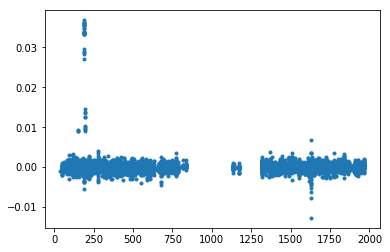

In [15]:
res = F.residuals(F.best_parameters)
plt.plot(F.mjds, res, ".")

In [16]:
F.goodness_of_fit(F.best_parameters)

DEBUG:threebody:Started residuals for {'f0': 365.95336876828094, 'shapiro': True, 'pm_x': -4.7253571656398304e-11, 'pm_y': 5.176655321908803e-11, 'j_NCY1400': 0.000675, 'asini_i': 1.2175268328187250986, 'eps2_i': -9.1322420630293142815e-05, 'delta_lan': -3.0460572022280719438e-05, 'eps2_o': -0.003462206702875036605, 'q_i': 0.13726885399693244624, 'general': True, 'j_GBT350': 1.8510494219682503864e-05, 'dgamma': 1.175749501990592583e-06, 'tasc_i': 0.40771687041875256721, 'ppn_mode': 'GR', 'd_RAJ': -3.2388334094615887816e-08, 'acosi_i': 1.4922596784609649978, 'acosi_o': 91.530732348852743868, 'special': True, 'tasc_o': 313.93576888835902119, 'eps1_o': 0.035186244412656308993, 'eps1_i': 0.00068692611243786728556, 'tol': 1e-16, 'd_PMRA': 9.885280864586482e-11, 'j_WSRT350': -3.6586764591042250491e-05, 'd_PMDEC': -1.9580532733266362e-10, 'lan': 22.854202311569486596, 'j_GBT820': 6.7999885696179984064e-05, 'use_quad': False, 'd_PX': -0.92477760701603597092, 'matrix_mode': 0, 'j_AO327': 6.5301

157289.02718996174298

In [17]:
params2 = params.copy()
params2["ppn_mode"] = "heavysimple"
F2 = threebody.Fitter(**params2)
F2.best_parameters = F.best_parameters.copy()
F2.best_parameters.update(dict(delta=0,dbeta=0,dgamma=0))
print F.goodness_of_fit(F.best_parameters)
print F2.goodness_of_fit(F2.best_parameters)

DEBUG:threebody:Fitting DM
DEBUG:threebody:base telescope AO_1400 from list of ['AO_1400', 'AO_430', 'GBT_1400', 'WSRT_1400', 'WSRT_350']
DEBUG:threebody:Started residuals for {'f0': 365.95336876828094, 'shapiro': True, 'pm_x': -4.7253571656398304e-11, 'pm_y': 5.176655321908803e-11, 'j_NCY1400': 0.000675, 'asini_i': 1.2175268328187250986, 'eps2_i': -9.1322420630293142815e-05, 'delta_lan': -3.0460572022280719438e-05, 'eps2_o': -0.003462206702875036605, 'q_i': 0.13726885399693244624, 'general': True, 'j_GBT350': 1.8510494219682503864e-05, 'dgamma': 1.175749501990592583e-06, 'tasc_i': 0.40771687041875256721, 'ppn_mode': 'GR', 'd_RAJ': -3.2388334094615887816e-08, 'acosi_i': 1.4922596784609649978, 'acosi_o': 91.530732348852743868, 'special': True, 'tasc_o': 313.93576888835902119, 'eps1_o': 0.035186244412656308993, 'eps1_i': 0.00068692611243786728556, 'tol': 1e-16, 'd_PMRA': 9.885280864586482e-11, 'j_WSRT350': -3.6586764591042250491e-05, 'd_PMDEC': -1.9580532733266362e-10, 'lan': 22.85420231

157289.02719


DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 1 at t_bb=46.8416
DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 3 at t_bb=47.7225
DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 7 at t_bb=47.7225
DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 15 at t_bb=48.7189
DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 31 at t_bb=57.7207
DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 63 at t_bb=67.6568
DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 127 at t_bb=69.8795
DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 255 at t_bb=75.6883
DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 511 at t_bb=78.8405
DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 1023 at t_bb=92.8037
DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 2047 at t_bb=116.992
DEBUG:threebody:Extracting results
DEBUG:threebody:Computing TOA 4095 at

157289.02719
